In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font",size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [154]:
train=pd.read_csv(r"C:\Users\shafat\Documents\Titanic\train.csv")

In [155]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [156]:
# missing value treatment

In [157]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we have missing values in column Age , Cabin and Embarked
I will impute the age with mean and for cabin , I will replace it with "NA" 
for embarked i will replace it with mode

In [158]:
train['Age']=train['Age'].fillna((train['Age'].mean()))

In [159]:
train['Embarked']=train['Embarked'].fillna((train['Embarked'].mode()))

In [160]:
train['Cabin']=train['Cabin'].fillna('na')

In [161]:
#chcek missing values
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

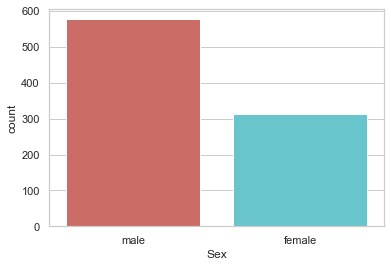

In [162]:
train['Sex'].value_counts()
sns.countplot(x='Sex',data=train,palette='hls')

plt.show()


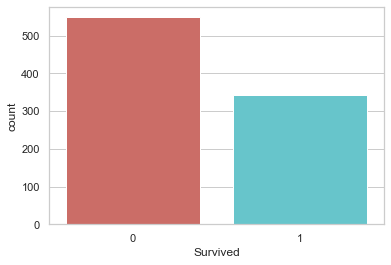

In [163]:
train['Survived'].value_counts()
sns.countplot(x='Survived',data=train,palette='hls')
plt.show()

data is not imbalanced hence will move further

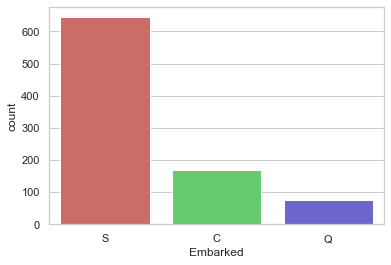

In [164]:
train['Embarked'].value_counts()
sns.countplot(x='Embarked',data=train,palette='hls')
plt.show()

# we can say from this graph that patient belonging to Southampton have died more

In [165]:
train.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,28.216730,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.505824,0.429809,0.235702,25.523893


In [166]:
train.groupby('Embarked').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.562419,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,29.113724,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.480855,0.571429,0.413043,27.079812


Text(0, 0.5, 'Survival Rate')

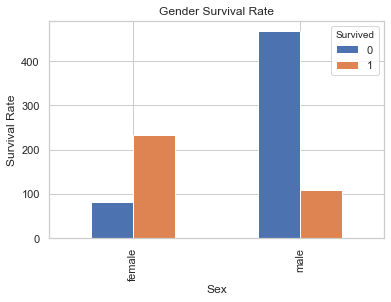

In [167]:
%matplotlib inline
pd.crosstab(train.Sex,train.Survived).plot(kind='bar')
plt.title('Gender Survival Rate')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')


Text(0, 0.5, 'Survival rate')

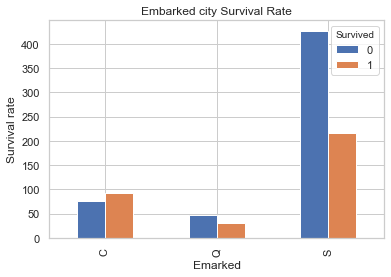

In [168]:
%matplotlib inline
pd.crosstab(train.Embarked,train.Survived).plot(kind='bar')
plt.title('Embarked city Survival Rate')
plt.xlabel('Emarked')
plt.ylabel('Survival rate')

Text(0, 0.5, 'Survival Rate')

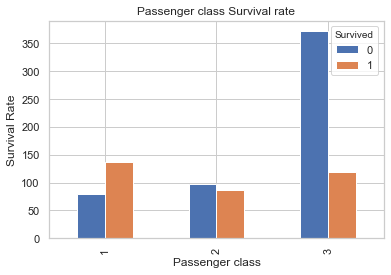

In [169]:
%matplotlib inline
pd.crosstab(train.Pclass,train.Survived).plot(kind='bar')
plt.title('Passenger class Survival rate')
plt.xlabel('Passenger class')
plt.ylabel('Survival Rate')

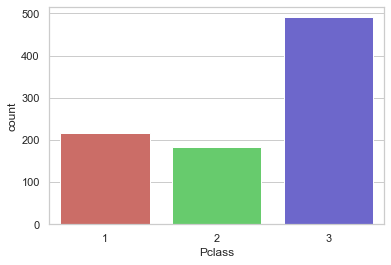

In [170]:
train['Pclass'].value_counts()
sns.countplot(x='Pclass',data=train,palette='hls')
plt.show()

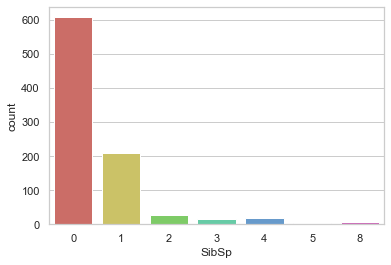

In [171]:
train['SibSp'].value_counts()
sns.countplot(x='SibSp',data=train,palette='hls')
plt.show()

Text(0, 0.5, 'Survival Rate')

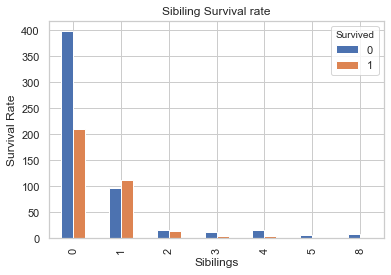

In [172]:
%matplotlib inline
pd.crosstab(train.SibSp,train.Survived).plot(kind='bar')
plt.title('Sibiling Survival rate')
plt.xlabel('Sibilings')
plt.ylabel('Survival Rate')

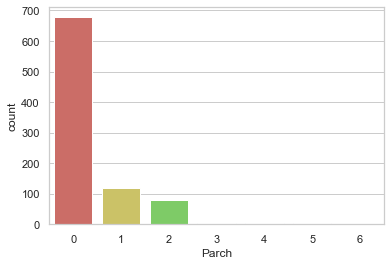

In [173]:
train['Parch'].value_counts()
sns.countplot(x='Parch',data=train,palette='hls')
plt.show()

Text(0, 0.5, 'Survival Rate')

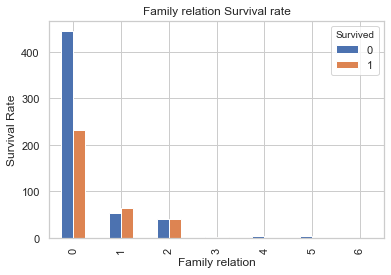

In [174]:
%matplotlib inline
pd.crosstab(train.Parch,train.Survived).plot(kind='bar')
plt.title('Family relation Survival rate')
plt.xlabel('Family relation')
plt.ylabel('Survival Rate')

In [175]:
cat_vars=['Pclass','Sex','SibSp','Parch','Embarked']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(train[var], prefix=var)
    data1=train.join(cat_list)
    train=data1
cat_vars=['Pclass','Sex','SibSp','Parch','Embarked']
data_vars=train.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [176]:
data_final=train[to_keep]
data_final.columns.values


array(['PassengerId', 'Survived', 'Name', 'Age', 'Ticket', 'Fare',
       'Cabin', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'], dtype=object)

In [189]:
X = data_final.loc[:, data_final.columns != 'Survived']
y = data_final.loc[:, data_final.columns == 'Survived']


In [193]:
X.head(2)

,PassengerId,Name,Age,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,1,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,na,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C85,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [204]:
X

,PassengerId,Name,Age,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,1,"Braund, Mr. Owen Harris",22.000000,A/5 21171,7.2500,na,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,PC 17599,71.2833,C85,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,3,"Heikkinen, Miss. Laina",26.000000,STON/O2. 3101282,7.9250,na,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,113803,53.1000,C123,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,5,"Allen, Mr. William Henry",35.000000,373450,8.0500,na,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",27.000000,211536,13.0000,na,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
887,888,"Graham, Miss. Margaret Edith",19.000000,112053,30.0000,B42,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,W./C. 6607,23.4500,na,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
889,890,"Behr, Mr. Karl Howell",26.000000,111369,30.0000,C148,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [221]:
data_final_vars=data_final.columns.values.tolist()
y=train['Survived']
X=[i for i in data_final_vars if i not in y]
X=train[X]
X.drop('Name', axis=1, inplace=True)
X.drop('Ticket', axis=1, inplace=True)
X.drop('Cabin', axis=1, inplace=True)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[False  True False False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True False  True
  True  True]
[7 1 3 6 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 4 1 1 1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

The RFE has helped us select the following features: 'Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_4', 'Parch_5','Embarked_C', 'Embarked_Q', 'Embarked_S'.

In [225]:
cols=['Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_4', 'Parch_5','Embarked_C', 'Embarked_Q', 'Embarked_S']

In [226]:
X=X[cols]

In [228]:
y=train['Survived']

The RFE has helped us select the following features:   'Age',  'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2',
       'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1',
       'Parch_2', 'Parch_4', 'Parch_5','Embarked_C',
       'Embarked_Q', 'Embarked_S'.

In [229]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.430720
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                               Results: Logit
Model:                  Logit                Pseudo R-squared:     0.353     
Dependent Variable:     Survived             AIC:                  805.5431  
Date:                   2021-05-17 20:31     BIC:                  896.5977  
No. Observations:       891                  Log-Likelihood:       -383.77   
Df Model:               18                   LL-Null:              -593.33   
Df Residuals:           872                  LLR p-value:          9.3903e-78
Converged:              0.0000               Scale:                1.0000    
No. Iterations:         35.0000                                              
-----------------------------------------------------------------------------
            Coef.      Std.Err.      z    P>|z|      [0.025         0.975]   
-----------------------------------------------------------------------------
Age         -0.0372        0.0084 -4.4488 0.0000        -0.0536       -0.0208
Pclass_1     5.683

In [232]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [233]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


The result is telling us that we have 144+73 correct predictions and 27+24 incorrect predictions.

In [235]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       168
           1       0.75      0.73      0.74       100

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



Of the entire dataset 81% of the people survived 

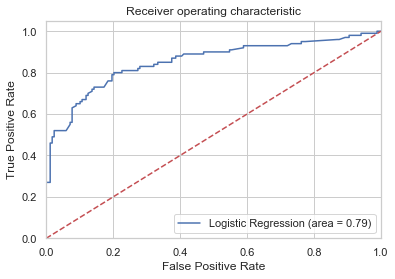

In [236]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [238]:
#The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. 
#The dotted line represents the ROC curve of a purely random classifier; 
#a good classifier stays as far away from that line as possible (toward the top-left corner).

In [286]:
test_doc=pd.read_csv(r"C:\Users\shafat\Documents\Titanic\test.csv")


In [287]:
test_doc.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [288]:
test_doc.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [289]:
cat_vars1=['Pclass','Sex','SibSp','Parch','Embarked']
for var in cat_vars:
    cat_list1='var'+'_'+var
    cat_list1 = pd.get_dummies(test_doc[var], prefix=var)
    data2=test_doc.join(cat_list1)
    test_doc=data2
cat_vars1=['Pclass','Sex','SibSp','Parch','Embarked']
data_vars1=test_doc.columns.values.tolist()
to_keep=[i for i in data_vars1 if i not in cat_vars1]

In [290]:
data_final1=test_doc[to_keep]
data_final1.columns.values

array(['PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5',
       'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4',
       'Parch_5', 'Parch_6', 'Parch_9', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'], dtype=object)

In [291]:
X1 = data_final1.loc[:, data_final1.columns != 'Survived']
y1 = data_final1.loc[:, data_final1.columns == 'Survived']


In [292]:
X1

,PassengerId,Name,Age,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S
0,892,"Kelly, Mr. James",34.5,330911,7.8292,NaN,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,363272,7.0000,NaN,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,240276,9.6875,NaN,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,895,"Wirz, Mr. Albert",27.0,315154,8.6625,NaN,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,3101298,12.2875,NaN,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",NaN,A.5. 3236,8.0500,NaN,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
414,1306,"Oliva y Ocana, Dona. Fermina",39.0,PC 17758,108.9000,C105,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
415,1307,"Saether, Mr. Simon Sivertsen",38.5,SOTON/O.Q. 3101262,7.2500,NaN,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
416,1308,"Ware, Mr. Frederick",NaN,359309,8.0500,NaN,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [293]:
X1.drop('PassengerId', axis=1, inplace=True)
#y_pred = logreg.predict(X1)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [257]:
X1

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S
0,34.5,7.8292,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,47.0,7.0000,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,62.0,9.6875,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,27.0,8.6625,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,22.0,12.2875,0,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,8.0500,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
414,39.0,108.9000,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
415,38.5,7.2500,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
416,NaN,8.0500,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [294]:
X1.isnull().sum()

Name            0
Age            86
Ticket          0
Fare            1
Cabin         327
Pclass_1        0
Pclass_2        0
Pclass_3        0
Sex_female      0
Sex_male        0
SibSp_0         0
SibSp_1         0
SibSp_2         0
SibSp_3         0
SibSp_4         0
SibSp_5         0
SibSp_8         0
Parch_0         0
Parch_1         0
Parch_2         0
Parch_3         0
Parch_4         0
Parch_5         0
Parch_6         0
Parch_9         0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [296]:
X1['Age']=X1['Age'].fillna((X1['Age'].mean()))

In [295]:
X1.drop('Fare', axis=1, inplace=True)
X1.drop('Cabin', axis=1, inplace=True)


In [266]:
y_pred = logreg.predict(X1)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [297]:
cols=['Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_4', 'Parch_5','Embarked_C', 'Embarked_Q', 'Embarked_S']

In [298]:
X1=X1[cols]

In [306]:
y_pred = logreg.predict(X1)

In [275]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X1, y_pred)))

Accuracy of logistic regression classifier on test set: 1.00


In [278]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
logreg = LogisticRegression()
logreg.fit(X1,y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [279]:
y_pred = logreg.predict(X1)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [307]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [281]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X1, y_pred)))

Accuracy of logistic regression classifier on test set: 1.00


In [308]:
Y11=pd.DataFrame(y_pred)

In [311]:
Y11.to_excel (r'C:\Users\shafat\Documents\Titanic\export_dataframe1.xlsx', index = False, header=True)

In [305]:
X1

,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_4,Parch_5,Embarked_C,Embarked_Q,Embarked_S
0,34.50000,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,47.00000,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,62.00000,0,1,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,27.00000,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,22.00000,0,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,30.27259,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
414,39.00000,1,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
415,38.50000,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
416,30.27259,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [309]:
Y11

,0
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0
